In [158]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [159]:
df = pd.read_csv('E:\\Datasets\\train (1).csv',usecols = ['Age','Fare','Survived'])

In [160]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [161]:
df.isnull().mean()*100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [162]:
x = df.drop(columns = ['Survived'])
y = df['Survived']

In [163]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =.2,random_state =2)

In [164]:
x_train

,Age,Fare
30,40.0,27.7208
10,4.0,16.7000
873,47.0,9.0000
182,9.0,31.3875
876,20.0,9.8458
...,...,...
534,30.0,8.6625
584,NaN,8.7125
493,71.0,49.5042
527,NaN,221.7792


In [165]:
x_train['Age_imputed'] = x_train['Age']
x_test['Age_imputed'] = x_test['Age']

In [166]:
x_train

,Age,Fare,Age_imputed
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0
...,...,...,...
534,30.0,8.6625,30.0
584,NaN,8.7125,NaN
493,71.0,49.5042,71.0
527,NaN,221.7792,NaN


In [167]:
x_test

,Age,Fare,Age_imputed
707,42.0,26.2875,42.0
37,21.0,8.0500,21.0
615,24.0,65.0000,24.0
169,28.0,56.4958,28.0
68,17.0,7.9250,17.0
...,...,...,...
89,24.0,8.0500,24.0
80,22.0,9.0000,22.0
846,NaN,69.5500,NaN
870,26.0,7.8958,26.0


In [168]:
x_train.isnull().sum()

Age            148
Fare             0
Age_imputed    148
dtype: int64

In [169]:
x_train['Age_imputed'] = x_train['Age']
x_train

,Age,Fare,Age_imputed
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0
...,...,...,...
534,30.0,8.6625,30.0
584,NaN,8.7125,NaN
493,71.0,49.5042,71.0
527,NaN,221.7792,NaN


In [170]:
random_values = x_train['Age'].dropna().sample(x_train['Age'].isnull().sum()).values

In [171]:
x_train['Age_imputed'][x_train['Age_imputed'].isnull()] = random_values 


In [172]:
#  x_train['Age'][x_train['Age'].isnull()] = random_values

In [175]:
x_train

,Age,Fare,Age_imputed
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0
...,...,...,...
534,30.0,8.6625,30.0
584,NaN,8.7125,22.0
493,71.0,49.5042,71.0
527,NaN,221.7792,48.0


C:\Users\Moavia computer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Moavia computer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


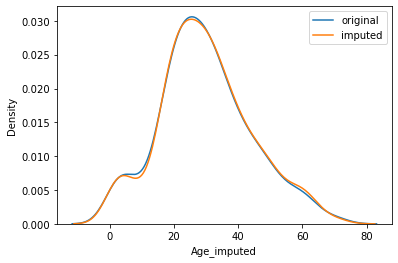

In [183]:
sns.distplot(x_train['Age'],label='original',hist=False)
sns.distplot(x_train['Age_imputed'],label = 'imputed',hist = False)

plt.legend()
plt.show()

In [185]:
print('The variance of original columns is :',x_train['Age'].var())
print('The variance of imputed columns is :',x_train['Age_imputed'].var())

The variance of original columns is : 204.3495133904614
The variance of imputed columns is : 205.55830816147537


In [188]:
x_train[['Fare','Age','Age_imputed']].cov()

,Fare,Age,Age_imputed
Fare,2368.246832,71.512440,59.562722
Age,71.512440,204.349513,204.349513
Age_imputed,59.562722,204.349513,205.558308


<AxesSubplot:>

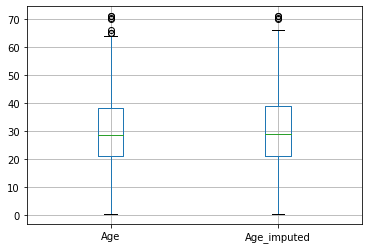

In [190]:
x_train[['Age','Age_imputed']].boxplot()